<a href="https://colab.research.google.com/github/isabelabianca/horse-or-human/blob/main/horse-human-classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Checkpoint 2**
## Classificador de imagens utilizando o dataset Horse or Human da biblioteca TensorFlow

▶ Com referência dos modelos de [ Rishi Mishra](https://medium.datadriveninvestor.com/horse-or-human-image-classification-c98b9dc94f6f) e [Mohit Tiwari](https://github.com/Tiwarim386/Horse-vs-Human-Classifier).


In [ ]:
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from keras.preprocessing import image
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow import keras

In [ ]:
# Importando dataset Horse or Human

# Imagens para treinamento
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

# Imagens para validação
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2022-04-29 19:29:09--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  30.0MB/s    in 4.8s    

2022-04-29 19:29:15 (30.0 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2022-04-29 19:29:15--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 

In [ ]:
# Definindo callbacks que irão antecipar a parada do treinamento caso o modelo atinja a precisão desejada.

class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy')>.97):
                print("\nParando treinamento por atingir 97% de acurácia")
                self.model.stop_training = True

callbacks = myCallback()

In [ ]:
# Descompactando o dataset, que é importado no formato .zip
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

In [ ]:
# Definindo os conjuntos de treinamento e validação para os dois tipos de imagem

# Imagens de cavalo para treinamento
train_horse = os.path.join('/tmp/horse-or-human/horses')

# Imagens de humano para treinamento
train_human = os.path.join('/tmp/horse-or-human/humans')

# Imagens de cavalo para validação
validation_horse = os.path.join('/tmp/validation-horse-or-human/horses')

# Imagens de humano para validação
validation_human = os.path.join('/tmp/validation-horse-or-human/humans')

In [ ]:
print('Total de imagens de cavalo para treinamento:', len(os.listdir(train_horse)))
print('Total de imagens de humano para treinamento:', len(os.listdir(train_human)))
print('Total de imagens de cavalo para validação:', len(os.listdir(validation_horse)))
print('Total de imagens de humano para validação:', len(os.listdir(validation_human)))

Total de imagens de cavalo para treinamento: 500
Total de imagens de humano para treinamento: 527
Total de imagens de cavalo para validação: 128
Total de imagens de humano para validação: 128


In [ ]:
# Visualizando alguns arquivos contidos nas pastas de imagens de treinamento e validação

train_horse_names = os.listdir(train_horse)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human)
print(train_human_names[:10])

validation_horse_hames = os.listdir(validation_horse)
print(validation_horse_hames[:10])

validation_human_names = os.listdir(validation_human)
print(validation_human_names[:10])

['horse41-2.png', 'horse20-1.png', 'horse38-8.png', 'horse50-3.png', 'horse38-2.png', 'horse28-0.png', 'horse13-1.png', 'horse48-5.png', 'horse45-2.png', 'horse18-9.png']
['human15-30.png', 'human09-06.png', 'human11-20.png', 'human17-17.png', 'human02-03.png', 'human04-15.png', 'human08-13.png', 'human05-07.png', 'human10-20.png', 'human16-20.png']
['horse6-064.png', 'horse2-596.png', 'horse6-544.png', 'horse2-136.png', 'horse6-275.png', 'horse5-303.png', 'horse5-400.png', 'horse4-232.png', 'horse4-000.png', 'horse5-123.png']
['valhuman05-08.png', 'valhuman04-20.png', 'valhuman05-20.png', 'valhuman02-07.png', 'valhuman02-06.png', 'valhuman04-12.png', 'valhuman03-20.png', 'valhuman01-04.png', 'valhuman05-10.png', 'valhuman01-15.png']


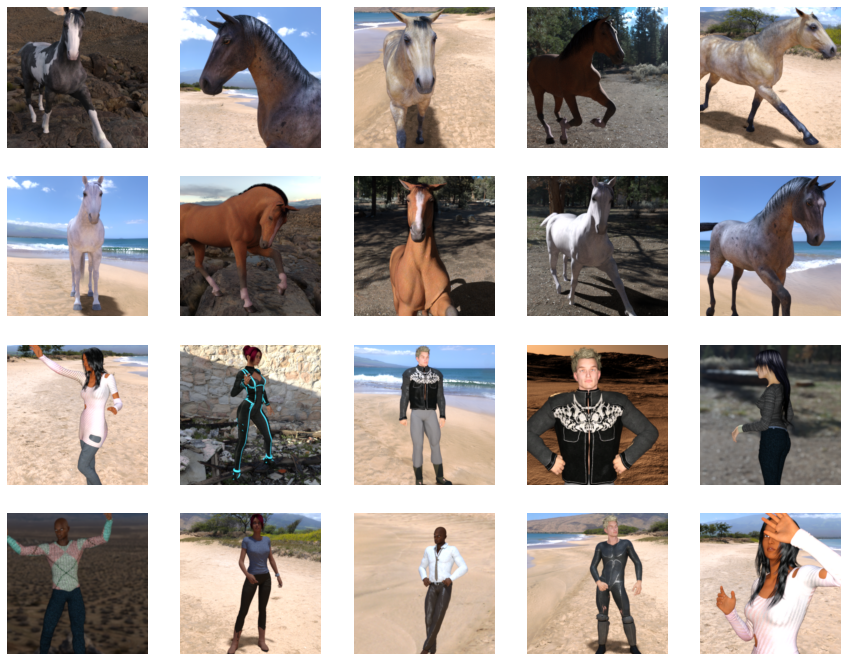

In [ ]:
# Plotando algumas imagens do dataset

# Definindo os parâmetros do gráfico, neste caso configuraremos as imagens em 5x5
n_rows = 5 
n_columns = 5 

# Índice para iterar o array das imagens
pic_ind = 0 

# Obtém a figura atual
fig = plt.gcf() 

# Definindo tamanho de exibição
fig.set_size_inches(n_columns*3, n_rows* 3) 

# Obtendo o caminho para as imagens
next_horse_pic = [os.path.join(train_horse, fname) for fname in train_horse_names[pic_ind:pic_ind+10]] 
next_human_pic = [os.path.join(train_human, fname) for fname in train_human_names[pic_ind:pic_ind+10]] 

for i, img_path in enumerate(next_horse_pic+next_human_pic): 
# Plotando várias imagens ao lado uma da outra (subplot)
  plt.subplot(n_rows, n_columns, i+1) 
  plt.axis(False) # Para não mostrar grades nas imagens
  img = mpimg.imread(img_path) 
  plt.imshow (img)

# Exibindo as imagens
plt.show()


In [ ]:
# Pré-processamento dos dados

# Redimensionando as imagens para 1/255 para normalizar os dados
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Todas as imagens serão redimensionadas para 300x300

# Imagens para treinamento
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  
        target_size=(300, 300),
        batch_size=128,
        class_mode='binary')

# Imagens para validação
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',
        target_size=(300, 300),
        batch_size=32,
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
# Definindo o modelo

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [ ]:
# Definindo otimizador e métricas

model.compile(
                loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [ ]:
# Treinando o modelo por 15 épocas, utilizando o callback definido (97% de acurácia)

history=model.fit(
                    train_generator,  
                    validation_data = validation_generator,
                    epochs=15,
                    callbacks=[callbacks]
                  )
                    

Epoch 1/15
9/9 [==============================] - 102s 11s/step - loss: 0.6779 - accuracy: 0.5745 - val_loss: 0.6588 - val_accuracy: 0.5430
Epoch 2/15
9/9 [==============================] - 98s 11s/step - loss: 0.5138 - accuracy: 0.7624 - val_loss: 0.7834 - val_accuracy: 0.7891
Epoch 3/15
9/9 [==============================] - 97s 11s/step - loss: 0.2307 - accuracy: 0.8987 - val_loss: 1.4495 - val_accuracy: 0.8438
Epoch 4/15
9/9 [==============================] - 97s 11s/step - loss: 0.1865 - accuracy: 0.9279 - val_loss: 1.2647 - val_accuracy: 0.8281
Epoch 5/15
9/9 [==============================] - 100s 11s/step - loss: 0.1392 - accuracy: 0.9523 - val_loss: 0.9646 - val_accuracy: 0.8320
Epoch 6/15
9/9 [==============================] - ETA: 0s - loss: 0.0803 - accuracy: 0.9708
Parando treinamento por atingir 97% de acurácia
9/9 [==============================] - 97s 11s/step - loss: 0.0803 - accuracy: 0.9708 - val_loss: 1.6176 - val_accuracy: 0.8359


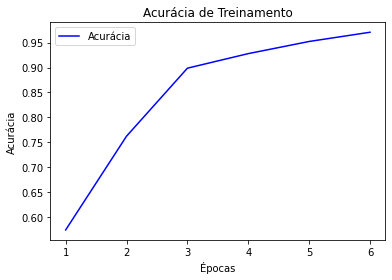

In [ ]:
# Avaliando resultados do treinamento

acc = history.history['accuracy']

epochs = range(1 , len(acc) + 1)

plt.plot(epochs , acc , 'b' , label = 'Acurácia' )
plt.title('Acurácia de Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')

plt.legend()
plt.rc('font', size = 9)
plt.rc('figure', figsize=[5,5])
plt.show()

In [ ]:
# Por fim, nesta célula podemos realizar o upload de alguma imagem de humano ou cavalo para que o modelo realize uma predição

uploaded = files.upload()

for fn in uploaded.keys():
 
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  plt.figure(figsize=(5, 5))
  plt.imshow(img)
  plt.show()
  plt.axis('False')
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  if classes[0]>0.5:
    print("É um humano")
  else:
    print("É um cavalo")